In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os 
import sys
import time
import tensorflow as tf
from tensorflow import keras

E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

In [3]:
#归一化操作  x = (s-u)/std   减去均值，除以方差

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#x_train:[none,28,28]-->[none,784]
x_train_scaler = scaler.fit_transform(
                            x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaler = scaler.fit_transform(
                            x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaler = scaler.fit_transform(
                            x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [4]:
#tf.keras.models.Sequential

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
#TensorBoard, EarlyStopping, ModelCheckpoint
logdir = '.\callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")

history = model.fit(x_train_scaler,y_train,epochs=10,
                   validation_data=(x_valid_scaler,y_valid),
                   
                   callbacks = [
                                keras.callbacks.TensorBoard(logdir),
                                keras.callbacks.ModelCheckpoint(output_model_file,save_best_noly=True),
                                keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]
                   )

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 128us/sample - loss: 0.5356 - acc: 0.8097 - val_loss: 0.4059 - val_acc: 0.8592
Epoch 2/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.3901 - acc: 0.8598 - val_loss: 0.3742 - val_acc: 0.8670
Epoch 3/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.3510 - acc: 0.8727 - val_loss: 0.3587 - val_acc: 0.8704
Epoch 4/10
55000/55000 [==============================] - 6s 100us/sample - loss: 0.3259 - acc: 0.8816 - val_loss: 0.3405 - val_acc: 0.8762
Epoch 5/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.3073 - acc: 0.8888 - val_loss: 0.3246 - val_acc: 0.8844
Epoch 6/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.2917 - acc: 0.8942 - val_loss: 0.3279 - val_acc: 0.8792
Epoch 7/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.2792 - acc: 0.8979 - val_los

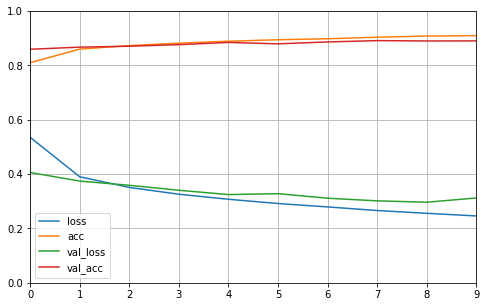

In [6]:
def plt_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plt_learning_curve(history)

In [ ]:
from keras import backend as K
model = load_model('C:/Users/dell/Desktop/python学习笔记/TF2.0/callbacks/fashion_mnist_model.h5') #replaced by your model name
layer_1 = K.function([model.layers[0].input], [model.layers[1].output])#第一个 model.layers[0],不修改,表示输入数据；第二个model.layers[you wanted],修改为你需要输出的层数的编号
f1 = layer_1([input_image])[0]#只修改inpu_image
#第一层卷积后的特征图展示，输出是（1,149,149,32），（样本个数，特征图尺寸长，特征图尺寸宽，特征图个数）
for _ in range(32):
            show_img = f1[:, :, :, _]
            show_img.shape = [149, 149]
            plt.subplot(4, 8, _ + 1)
            plt.imshow(show_img, cmap='gray')
            plt.axis('off')
plt.show()